In [9]:
import torch
from diffusers import DDPMScheduler
from torch.utils.data import DataLoader
from tqdm import tqdm
import sys
from pathlib import Path
import pandas as pd
from torchvision.transforms import ToPILImage
import numpy as np
from csbdeep.utils import normalize

sys.path.append('..')
from src import *

# Visualize Training Diffusion Process

In [29]:
TRAINSET = "dataset/astro"
dataset = Dataset2PM(TRAINSET)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1)
to_pil = ToPILImage()

In [24]:
noisy, cond = dataset[0]

<Axes: >

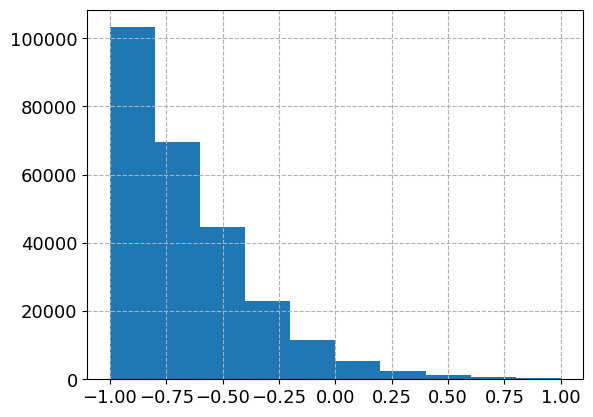

In [ ]:
pd.Series(noisy[0].numpy().flatten()).hist(figsize=(14, 5))

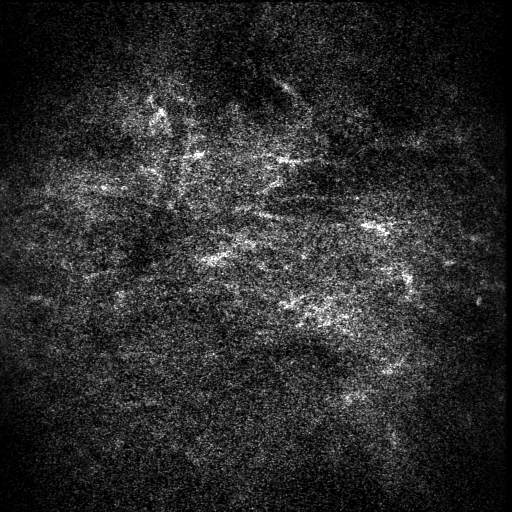

In [ ]:
to_pil((noisy.cpu()+1)/2)

In [122]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1_000)
eps = torch.randn_like(noisy)
t = torch.randint(0, 1_000, (noisy.size(0),), device=noisy.device)
noisy_t = noise_scheduler.add_noise(noisy, eps, torch.tensor([100]))

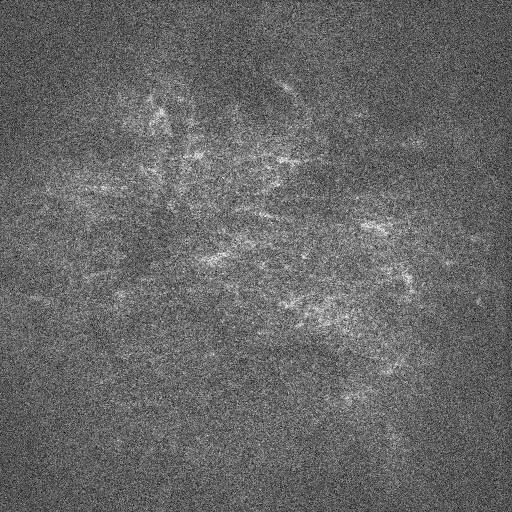

In [123]:
to_pil((noisy_t-torch.min(noisy_t))/torch.max(noisy_t-torch.min(noisy_t)))

## Visualize a prediction

In [161]:
pred = np.load("results/202508031808/pred/0.npy")
pred = np.clip(normalize(pred[0], 0.5, 99), min=0, max=1)

In [177]:
pred1 = np.load("results/202508031808/pred/0_1.npy")
pred1 = np.clip(normalize(pred1[0], 1.5, 99.75), min=0, max=1)

<Axes: >

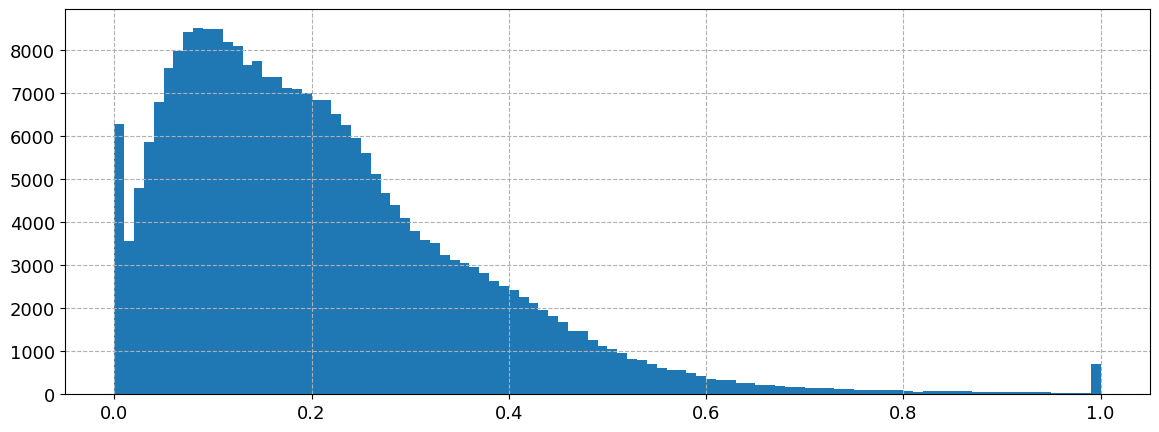

In [178]:
pd.Series(pred1.flatten()).hist(bins=100,figsize=(14,5))

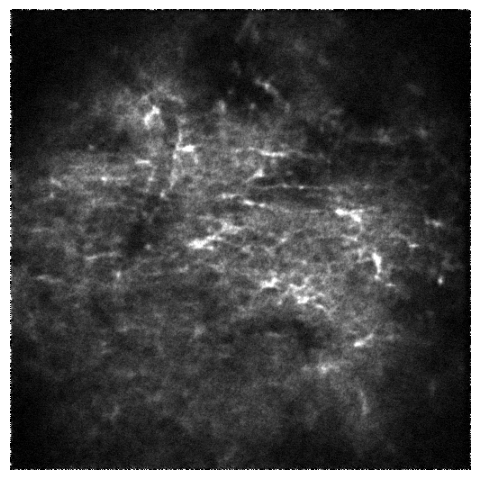

In [179]:
imshow([ pred1], cmap="grey", size=5)

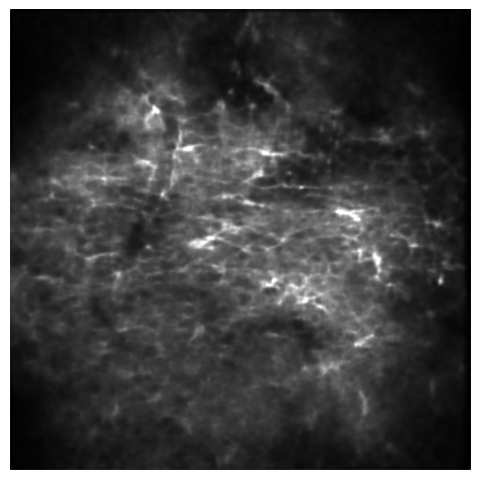

In [165]:
imshow(["dataset/astro/cond/0.png"],cmap="grey", size=5)

In [ ]:
mot_cor_np = tiff.imread(str(DATASETS["oabf_astro"] / "x.tiff"), key=range(0, 10_000, 8))